<a href="https://colab.research.google.com/github/MesonHu/Data1/blob/main/Gantt_Chart_Small_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deterministik Method

##Gantt Chart

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#My Data
jobs = {
    "J1": [
        [("M1", 1)],
        [("M2", 1.5), ("M3", 3)],
        [("M4", 1), ("M5", 2.5)],
        [("M12", 1), ("M13", 2.5)],
        [("M12", 1), ("M13", 2.5)]
    ],
    "J2": [
        [("M1", 9)],
        [("M2", 3.5), ("M3", 6)],
        [("M4", 5), ("M5", 7)],
        [("M7", 3),],
        [("M12", 1), ("M13", 2.5)],
        [("M12", 1), ("M13", 2.5)]
    ],
    "J3": [
        [("M1", 9)],
        [("M4", 1), ("M5", 2)],
        [("M4", 1.5), ("M5", 3)],
        [("M8", 1)],
        [("M11", 3.5), ("M12", 5)],
        [("M12", 1), ("M13", 2.5)]
    ],
    "J4": [
        [("M2", 3), ("M3", 5)],
        [("M7", 1)],
        [("M9", 1.5)],
        [("M10", 3.5), ("M11", 5)],
        [("M12", 2), ("M13", 3)]
    ],
    "J5": [
        [("M4", 1), ("M5", 2)],
        [("M6", 4.5),],
        [("M8", 1)],
        [("M10", 8), ("M11", 10)],
        [("M12", 1), ("M13", 2)]
    ],
    "J6": [
        [("M4", 1), ("M5", 2.5)],
        [("M6", 1)],
        [("M8", 1)],
        [("M10", 11), ("M11", 12)],
        [("M12", 1), ("M13", 2.5)]
    ],
    "J7": [
        [("M2", 1.5), ("M3", 2.5)],
        [("M4", 5), ("M5", 7)],
        [("M7", 4)],
        [("M9", 1.5)],
        [("M10", 1.5), ("M11", 2.5)],
        [("M12", 3), ("M13", 4)]
    ],
    "J8": [
        [("M4", 1), ("M5", 2)],
        [("M7", 6)],
        [("M8", 1)],
        [("M9", 1)],
        [("M10", 3), ("M11", 4)]
    ]
}

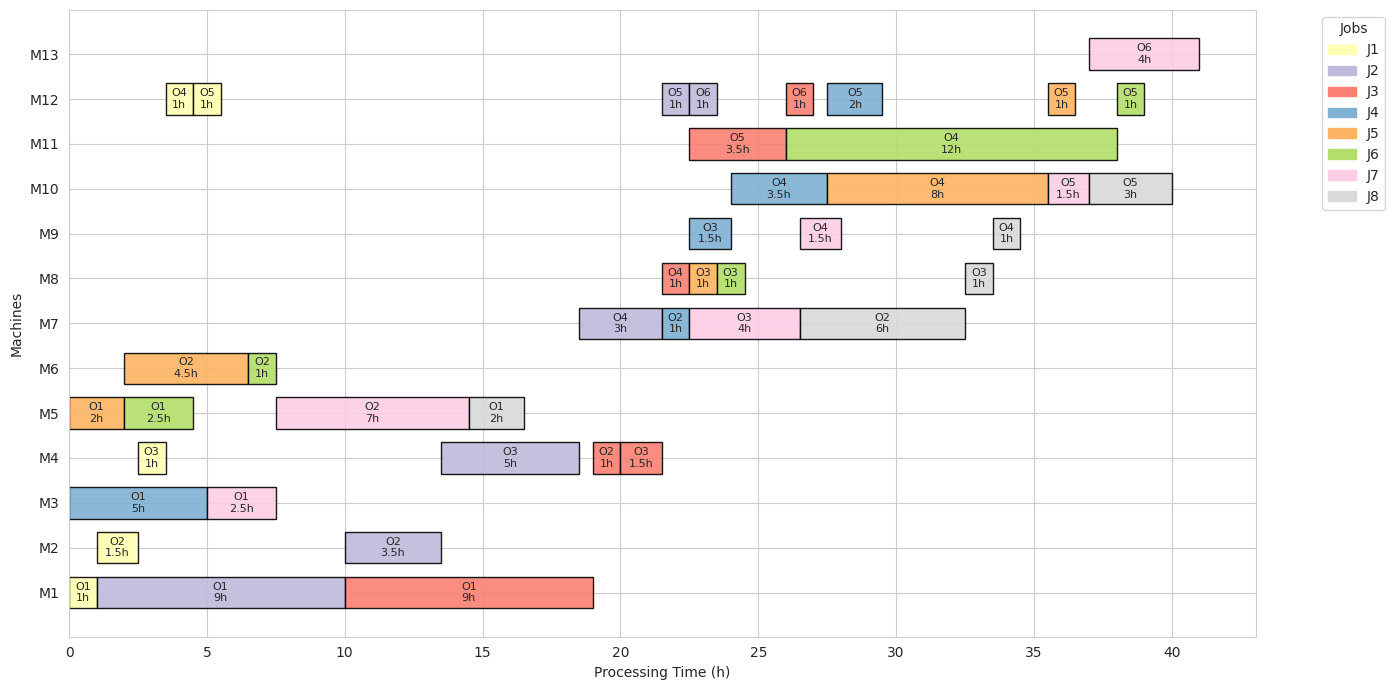

In [ ]:
# Algorthm:
machine_available = {}
job_ready = {job: 0 for job in jobs}
schedule = []

for job, ops in jobs.items():
    for idx, options in enumerate(ops, 1):
        best_choice = None
        best_end = float('inf')

        for machine, duration in options:
            start = max(job_ready[job], machine_available.get(machine, 0))
            end = start + duration
            if end < best_end:
                best_end = end
                best_choice = (machine, duration, start, end)

        machine, duration, start, end = best_choice
        schedule.append((job, f"O{idx}", machine, start, duration))

        job_ready[job] = end
        machine_available[machine] = end

sns.set_style("whitegrid")
colors = plt.cm.Set3.colors
job_colors = {f"J{i}": colors[i % len(colors)] for i in range(1, 9)}

fig, ax = plt.subplots(figsize=(14,7))

machines = sorted(set([m for (_,_,m,_,_) in schedule]),
                  key=lambda x: int(x[1:]))
machine_map = {m: i for i, m in enumerate(machines)}


for job, op, machine, start, duration in schedule:
    y = machine_map[machine]
    ax.barh(y, duration, left=start,
            color=job_colors[job],
            edgecolor="black", height=0.7, alpha=0.9)
    ax.text(start + duration/2, y, f"{op}\n{duration}h",
            ha="center", va="center", fontsize=8)

ax.set_yticks(range(len(machines)))
ax.set_yticklabels(machines)
ax.set_xlabel("Processing Time (h)")
ax.set_ylabel("Machines")

patches = [mpatches.Patch(color=job_colors[j], label=j) for j in job_colors]
ax.legend(handles=patches, title="Jobs", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


##Buffer and Production Plot

In [ ]:
job_production = {job:0 for job in jobs}
job_buffer = {job:0 for job in jobs}
machine_production = {}
machine_buffer = {}

all_machines = sorted({m for ops in jobs.values() for step in ops for m,_ in step}, key=lambda x:int(x[1:]))
machine_available = {m:0 for m in all_machines}
job_ready = {job:0 for job in jobs}

for job, ops in jobs.items():
    for idx, options in enumerate(ops, 1):
        best_choice = None
        best_end = float('inf')
        for machine, duration in options:
            start = max(job_ready[job], machine_available.get(machine,0))
            end = start + duration
            if end < best_end:
                best_end = end
                best_choice = (machine, duration, start, end)
        machine, duration, start, end = best_choice

        buffer_time = start - job_ready[job]
        job_production[job] += duration
        job_buffer[job] += buffer_time
        machine_production[machine] = machine_production.get(machine,0) + duration
        machine_buffer[machine] = machine_buffer.get(machine,0) + buffer_time

        job_ready[job] = end
        machine_available[machine] = end

def plot_horizontal_bar(data, title, color):
    items = list(data.keys())
    values = [data[i] for i in items]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(items, values, color=color, edgecolor='black')
    ax.set_xlabel("Hours")
    ax.set_title(title)
    for i, val in enumerate(values):
        ax.text(val+0.1, i, f"{val:.1f}", va='center')
    plt.tight_layout()
    plt.show()

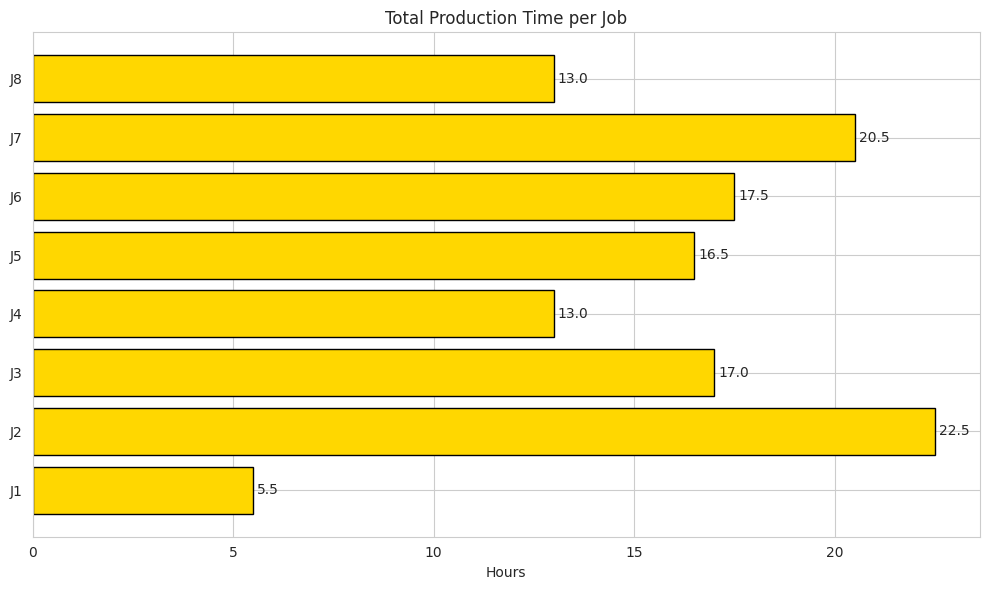

In [ ]:
# Production per Job
plot_horizontal_bar(job_production, "Total Production Time per Job", 'gold')

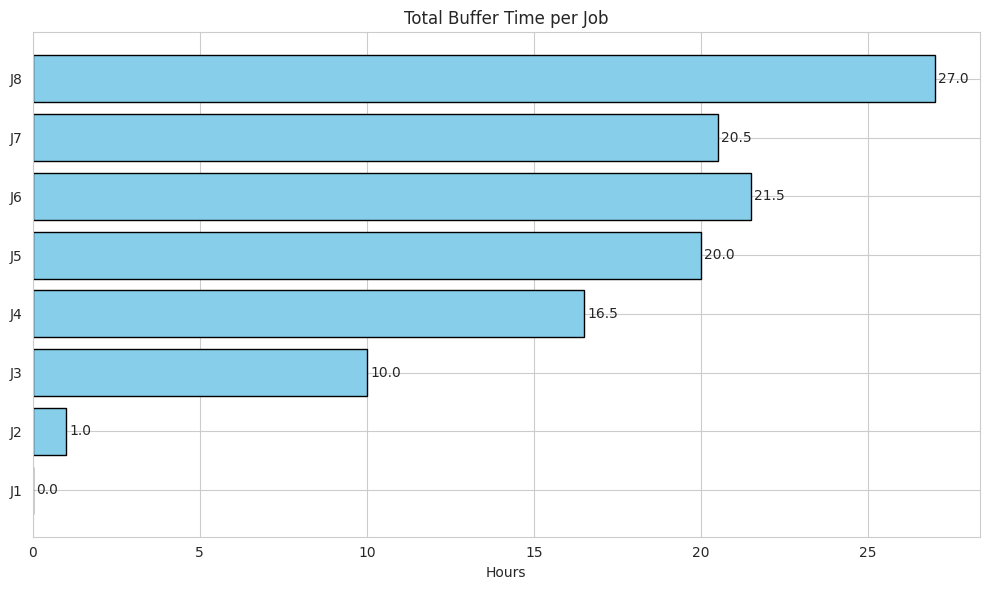

In [ ]:
# Buffer per Job
plot_horizontal_bar(job_buffer, "Total Buffer Time per Job", 'Skyblue')

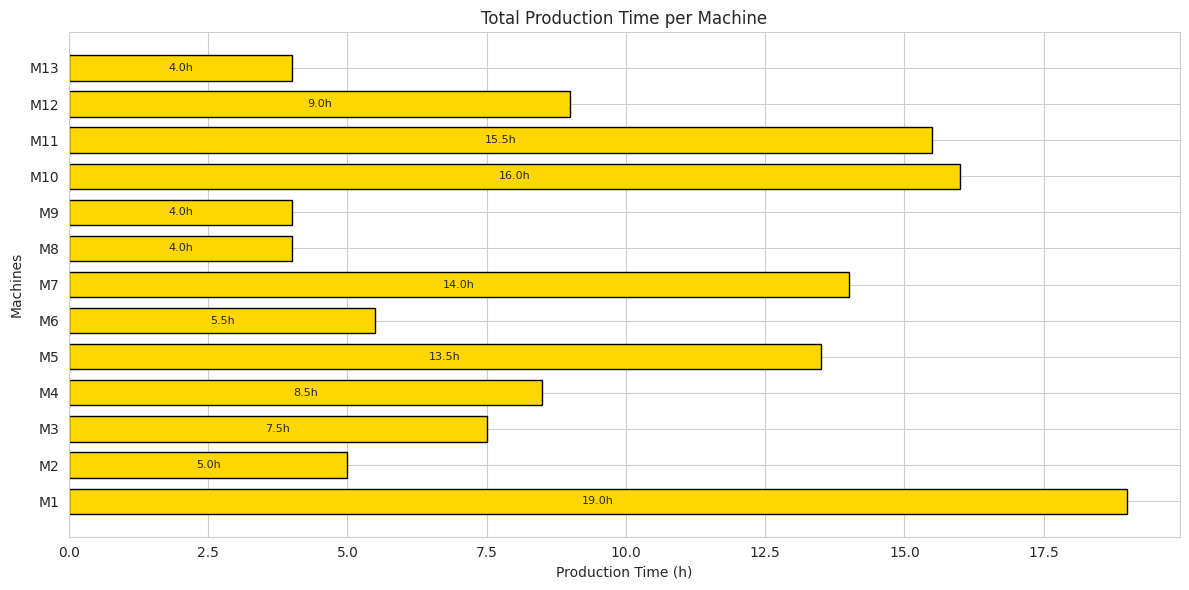

In [ ]:
machines_sorted = [f"M{i}" for i in range(1,14)]
machine_map = {m:i for i,m in enumerate(machines_sorted)}

fig, ax = plt.subplots(figsize=(12,6))
for m in machines_sorted:
    dur = machine_production.get(m,0)
    y = machine_map[m]
    ax.barh(y, dur, left=0, color='gold', edgecolor='black', height=0.7)
    if dur > 0:
        ax.text(dur/2, y, f"{dur:.1f}h", ha='center', va='center', fontsize=8)

ax.set_yticks(range(len(machines_sorted)))
ax.set_yticklabels(machines_sorted)
ax.set_xlabel("Production Time (h)")
ax.set_ylabel("Machines")
plt.title("Total Production Time per Machine")
plt.tight_layout()
plt.show()


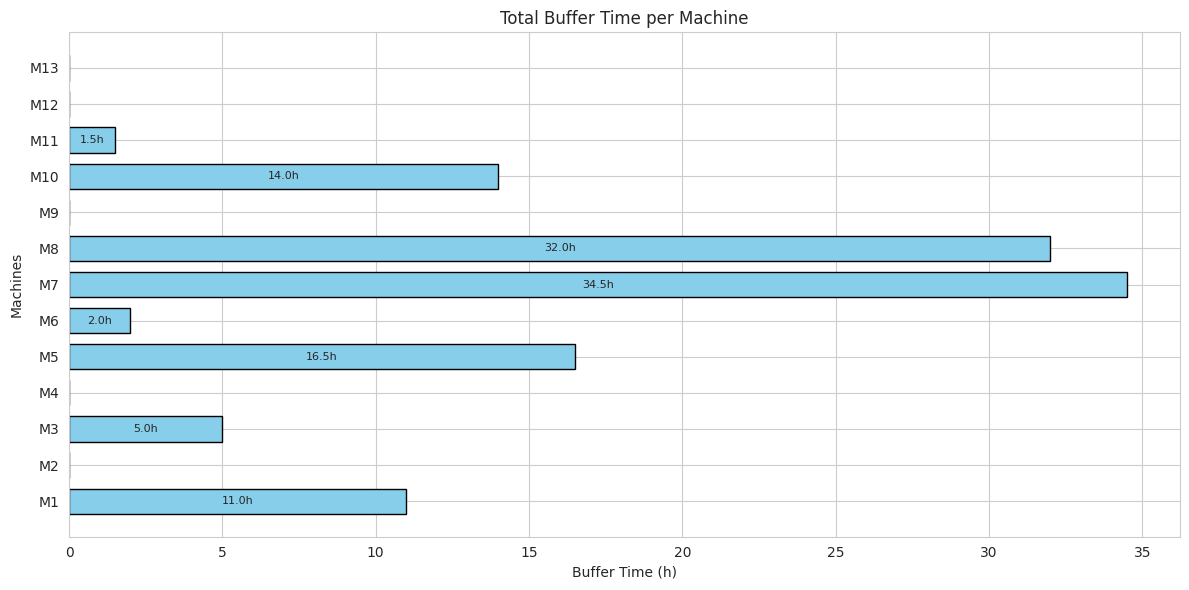

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
for m in machines_sorted:
    dur = machine_buffer.get(m,0)
    y = machine_map[m]
    ax.barh(y, dur, left=0, color='skyblue', edgecolor='black', height=0.7)
    if dur > 0:
        ax.text(dur/2, y, f"{dur:.1f}h", ha='center', va='center', fontsize=8)

ax.set_yticks(range(len(machines_sorted)))
ax.set_yticklabels(machines_sorted)
ax.set_xlabel("Buffer Time (h)")
ax.set_ylabel("Machines")
plt.title("Total Buffer Time per Machine")
plt.tight_layout()
plt.show()

#Genetic Algorithm (GA) Method

##Code

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [ ]:
POP_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.2

def generate_chromosome(jobs):
    chromosome = {}
    for job, ops in jobs.items():
        chromosome[job] = [random.choice([m for m,_ in op]) for op in ops]
    return chromosome

def fitness(chromosome):
    job_ready = {job:0 for job in jobs}
    machine_available = {}

    for step in range(max(len(ops) for ops in jobs.values())):
        for job, ops in jobs.items():
            if step >= len(ops):
                continue
            machine = chromosome[job][step]
            duration = next(d for m,d in ops[step] if m==machine)
            start = max(job_ready[job], machine_available.get(machine,0))
            end = start + duration
            job_ready[job] = end
            machine_available[machine] = end
    return max(job_ready.values())

def mutate(chromosome):
    new_chrom = {job: ops.copy() for job,ops in chromosome.items()}
    for job, ops in new_chrom.items():
        if random.random() < MUTATION_RATE:
            idx = random.randint(0, len(ops)-1)
            ops[idx] = random.choice([m for m,_ in jobs[job][idx]])
    return new_chrom

def crossover(parent1, parent2):
    child1, child2 = {}, {}
    for job in parent1.keys():
        point = random.randint(1, len(parent1[job])-1)
        child1[job] = parent1[job][:point] + parent2[job][point:]
        child2[job] = parent2[job][:point] + parent1[job][point:]
    return child1, child2

population = [generate_chromosome(jobs) for _ in range(POP_SIZE)]

# GA Main Loop
for gen in range(GENERATIONS):
    population = sorted(population, key=fitness)
    next_population = population[:2]
    while len(next_population) < POP_SIZE:
        parent1, parent2 = random.choices(population[:20], k=2)
        child1, child2 = crossover(parent1, parent2)
        next_population.extend([mutate(child1), mutate(child2)])
    population = next_population[:POP_SIZE]

best_chrom = min(population, key=fitness)
print(f"Best makespan: {fitness(best_chrom)} hours")

# Build Schedule with Production & Buffer
job_production = {job:0 for job in jobs}
job_buffer = {job:0 for job in jobs}
machine_production = {}
machine_buffer = {}

all_machines = sorted({m for ops in jobs.values() for step in ops for m,_ in step}, key=lambda x:int(x[1:]))
machine_available = {m:0 for m in all_machines}
job_ready = {job:0 for job in jobs}

schedule = []

for step in range(max(len(ops) for ops in jobs.values())):
    for job, ops in jobs.items():
        if step >= len(ops):
            continue
        machine = best_chrom[job][step]
        duration = next(d for m,d in ops[step] if m==machine)
        start = max(job_ready[job], machine_available[machine])
        end = start + duration
        buffer_time = start - job_ready[job]

        job_production[job] += duration
        job_buffer[job] += buffer_time
        machine_production[machine] = machine_production.get(machine,0) + duration
        machine_buffer[machine] = machine_buffer.get(machine,0) + buffer_time

        job_ready[job] = end
        machine_available[machine] = end

        schedule.append((job, f"O{step+1}", machine, start, duration))



Best makespan: 29.5 hours


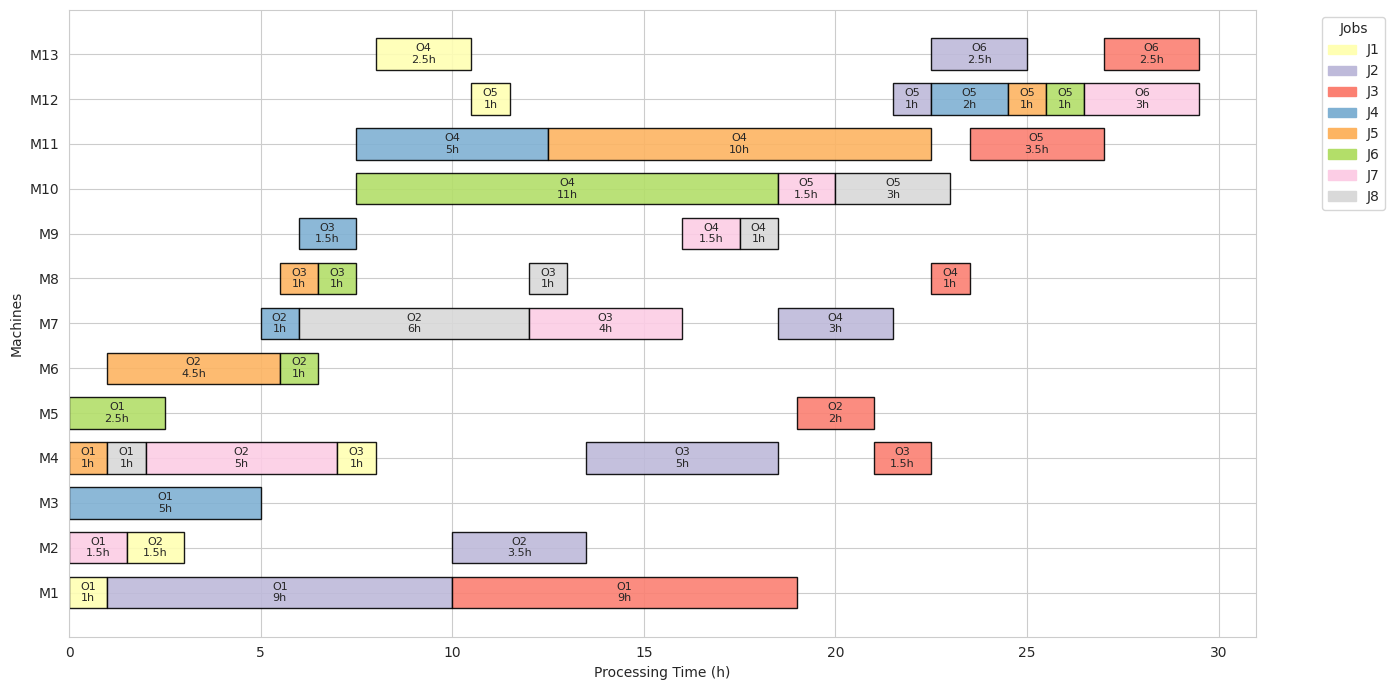

In [ ]:
# Gantt Chart
sns.set_style("whitegrid")
colors = plt.cm.Set3.colors
job_colors = {f"J{i}": colors[i % len(colors)] for i in range(1, 9)}

fig, ax = plt.subplots(figsize=(14,7))

machines = sorted(set([m for (_,_,m,_,_) in schedule]), key=lambda x:int(x[1:]))
machine_map = {m:i for i,m in enumerate(machines)}

for job, op, machine, start, duration in schedule:
    y = machine_map[machine]
    ax.barh(y, duration, left=start, color=job_colors[job], edgecolor="black", height=0.7, alpha=0.9)
    ax.text(start + duration/2, y, f"{op}\n{duration}h", ha="center", va="center", fontsize=8)

ax.set_yticks(range(len(machines)))
ax.set_yticklabels(machines)
ax.set_xlabel("Processing Time (h)")
ax.set_ylabel("Machines")
patches = [mpatches.Patch(color=job_colors[j], label=j) for j in job_colors]
ax.legend(handles=patches, title="Jobs", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

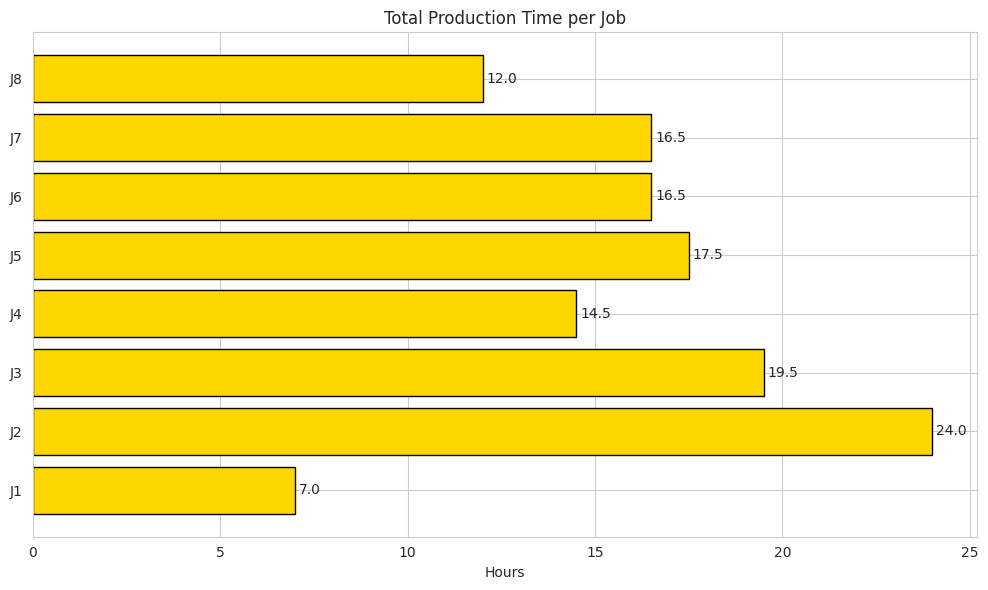

In [ ]:
# Production & Buffer Plots

def plot_horizontal_bar(data, title, color):
    items = list(data.keys())
    values = [data[i] for i in items]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(items, values, color=color, edgecolor='black')
    ax.set_xlabel("Hours")
    ax.set_title(title)
    for i, val in enumerate(values):
        ax.text(val+0.1, i, f"{val:.1f}", va='center')
    plt.tight_layout()
    plt.show()

plot_horizontal_bar(job_production, "Total Production Time per Job", 'gold')


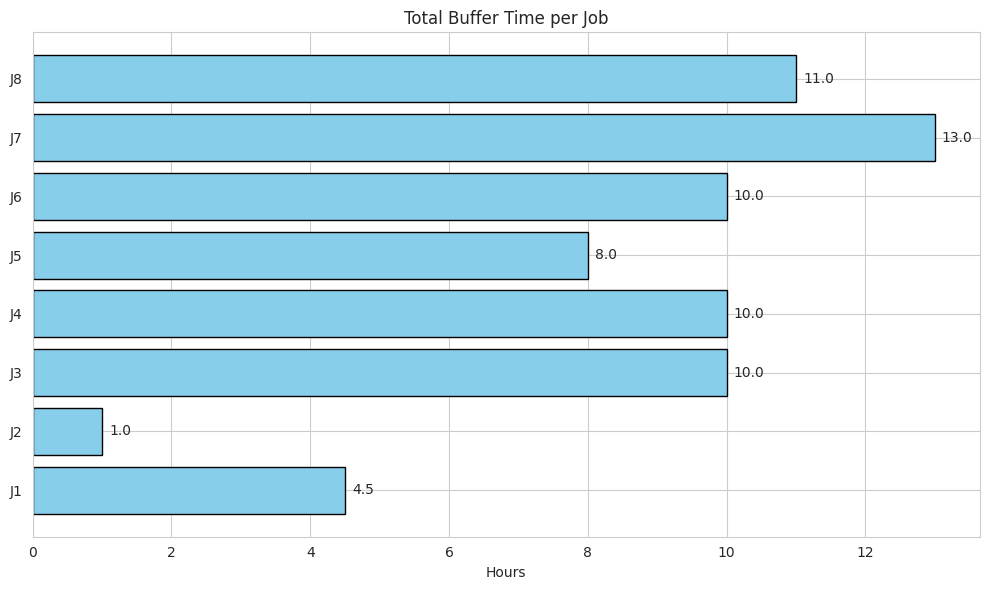

In [ ]:
plot_horizontal_bar(job_buffer, "Total Buffer Time per Job", 'skyblue')

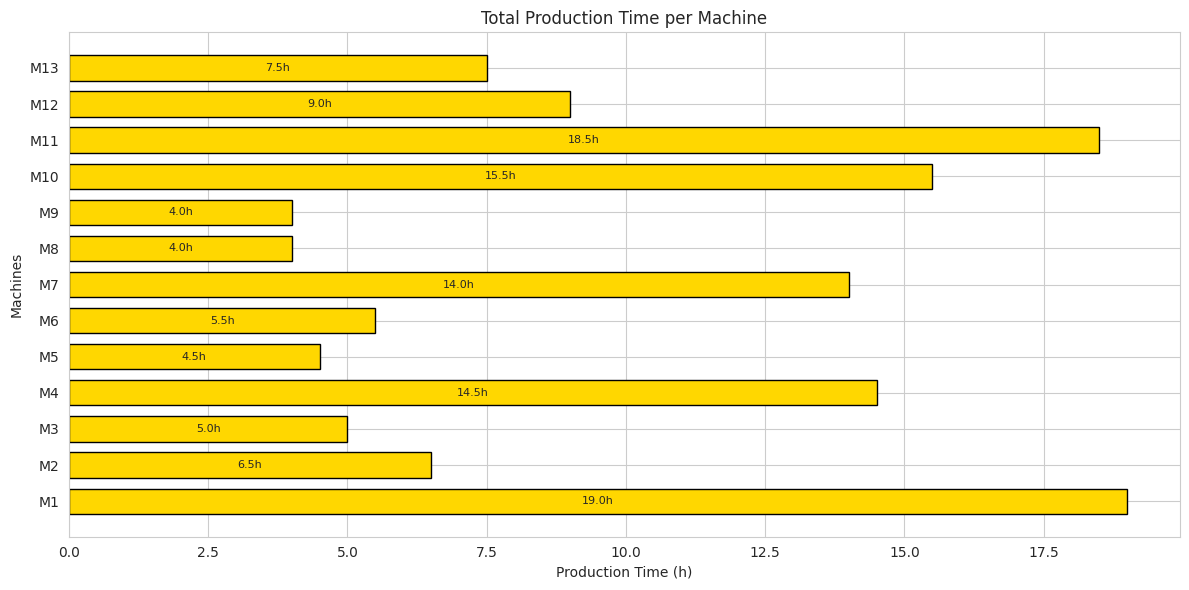

In [ ]:
machines_sorted = [f"M{i}" for i in range(1,14)]
machine_map = {m:i for i,m in enumerate(machines_sorted)}

# Production per machine
fig, ax = plt.subplots(figsize=(12,6))
for m in machines_sorted:
    dur = machine_production.get(m,0)
    y = machine_map[m]
    ax.barh(y, dur, left=0, color='gold', edgecolor='black', height=0.7)
    if dur>0:
        ax.text(dur/2, y, f"{dur:.1f}h", ha='center', va='center', fontsize=8)
ax.set_yticks(range(len(machines_sorted)))
ax.set_yticklabels(machines_sorted)
ax.set_xlabel("Production Time (h)")
ax.set_ylabel("Machines")
plt.title("Total Production Time per Machine")
plt.tight_layout()
plt.show()

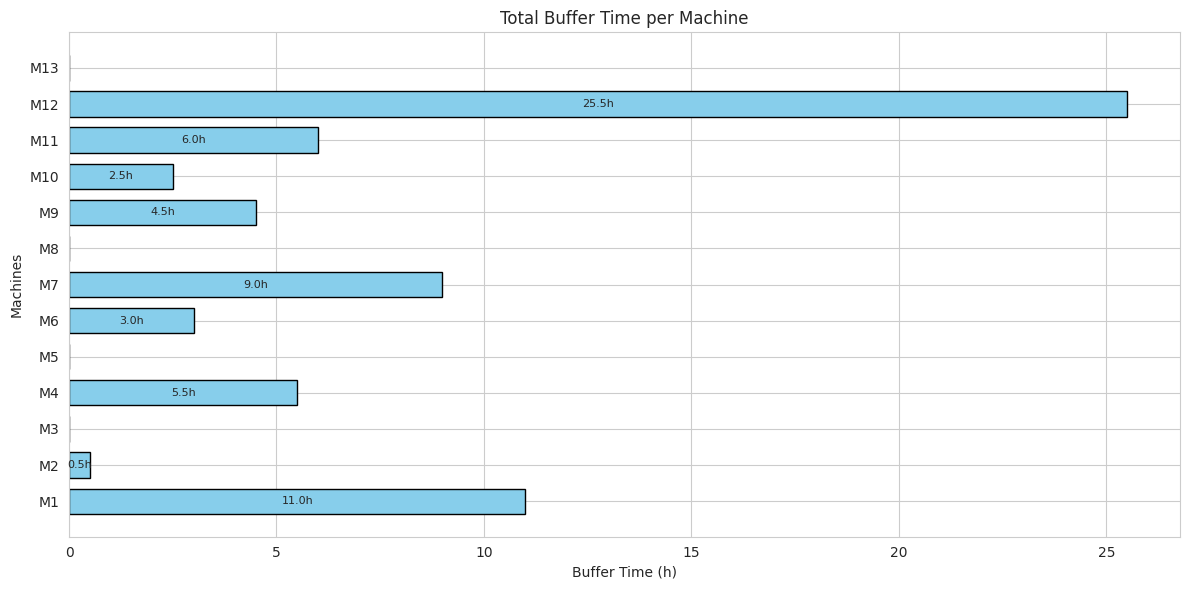

In [ ]:
# Buffer per machine
fig, ax = plt.subplots(figsize=(12,6))
for m in machines_sorted:
    dur = machine_buffer.get(m,0)
    y = machine_map[m]
    ax.barh(y, dur, left=0, color='skyblue', edgecolor='black', height=0.7)
    if dur>0:
        ax.text(dur/2, y, f"{dur:.1f}h", ha='center', va='center', fontsize=8)
ax.set_yticks(range(len(machines_sorted)))
ax.set_yticklabels(machines_sorted)
ax.set_xlabel("Buffer Time (h)")
ax.set_ylabel("Machines")
plt.title("Total Buffer Time per Machine")
plt.tight_layout()
plt.show()